In [1]:
import json
import csv
import numpy as np
import os
import gudhi
import plotly.graph_objects as go
import glob
import re
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt



In [2]:
##---EXAMPLE to visualize step, PH and filtration---##
"""
1) visualize the dynamic of the file

2)collect filtration value, barcodes 

"""

'\n1) visualize the dynamic of the file\n\n2)collect filtration value, barcodes \n\n'

In [3]:
#----------Inputs needed
name = "rings"
base_path = os.path.join("simulations", name)
txt=True
tsv=False


In [4]:
##------------Collecting files
if txt:
    files = glob.glob(f"{base_path}/{name}*.txt")
else:  # TSV case
    files = glob.glob(f"{base_path}/{name}*.tsv")

# --- file collection
indices = [int(re.findall(r'\d+', f)[-1]) for f in files]
files_sorted = [f for _, f in sorted(zip(indices, files))]
Y = [np.genfromtxt(f) for f in files_sorted]
n_iter = len(Y)  # number of files present


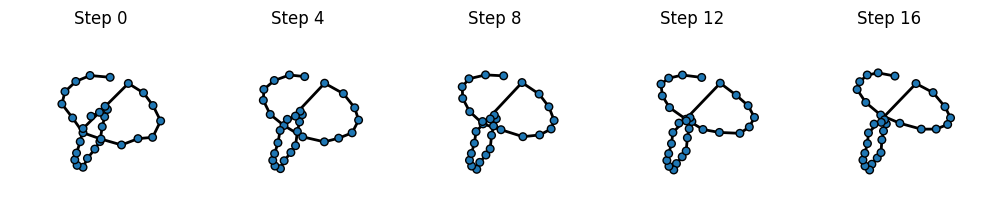

In [5]:
##---PRELIMINARY PLOT
fig = plt.figure(figsize=(10, 10))
steps = [0,4,8,12,16] #steps to visualize

for j, i in enumerate(steps):
    A = np.array(Y[i])

    ax = fig.add_subplot(1, 5, j+1, projection='3d')

 
    ax.scatter(A[:,1], A[:,0], A[:,2], s=30, edgecolors='black', alpha=1)
    ax.plot(A[:,1], A[:,0], A[:,2], linewidth=2, c='black')


    # first 15 points closed in a loop (0->14->0)
    #first_group = np.vstack([A[0:15], A[0]])  # adds the first point at the end
    #ax.plot(first_group[:,1], first_group[:,0], first_group[:,2], linewidth=2, c='black')

    # second 10 points closed in a loop (15->29->15)
    #second_group = np.vstack([A[15:30], A[15]])  # adds the first point of the group at the end
    #ax.plot(second_group[:,1], second_group[:,0], second_group[:,2], linewidth=2, c='black')
    
    ax.set_title(f"Step {i}")
    ax.set_axis_off()
    ax.view_init(elev=60)

plt.tight_layout()
#plt.savefig("dynamic_"+name+".pdf", bbox_inches='tight')  
plt.show()

In [6]:
##---FILTRATION VALUES COLLECTION (for txt)

In [7]:

dims=[0,1]
output_dir = "PH/PH_" + name
os.makedirs(output_dir, exist_ok=True) #find directory or create one if does not exist

for step in range (0,n_iter):
    if txt:
        points = np.loadtxt(f"simulations/{name}/{name}{step}.txt")
    else:  # caso TSV
        points = np.loadtxt(f"simulations/{name}/{name}{step}.tsv", delimiter="\t")

    
    rips_complex = gudhi.RipsComplex(points=points)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2) #max_dimension=2 to stop at H1
    flt=[]
    flt = simplex_tree.get_filtration()
    flt = sorted(flt, key=lambda x: (len(x[0]), x[0])) #ordering needed for vineyards
    
   
    PH = simplex_tree.persistence()
    PHs = [[y for y in PH if y[0] == x] for x in dims] 
    
    bar = [x[1] for x in PHs[1]]
    births = [b for b, d in bar]
    deaths = [d for b, d in bar]
    
    persistence=(np.array(deaths)-np.array(births)).tolist()
    dic = {
        "barcode": [births, deaths],
        "persistence": persistence,
        "filtration": flt
    }
    # save on JSON file
    out_file = os.path.join(output_dir, f"PH_{step}.json")
    with open(out_file, "w") as f:
        json.dump(dic, f, indent=2)
    
    
  

In [8]:
###--------Example only for 1 step

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

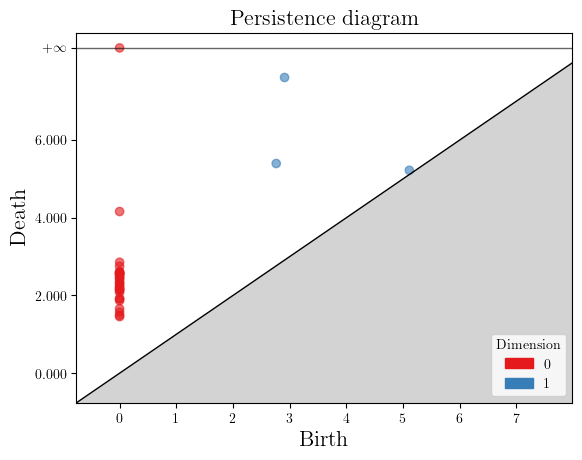

In [9]:
name='rings'
step=1
points = np.loadtxt('simulations/'+name+'/'+name+str(step)+'.txt')  

rips_complex = gudhi.RipsComplex(points=points)

simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)


flt=[]
flt=  simplex_tree.get_filtration(); 
flt = sorted(flt, key=lambda x: (len(x[0]), x[0])) #for vine implementation

##----check persistent diagram

PH = simplex_tree.persistence()

dims = range(0, 2) 
dims = [x for x in dims if x < 9]
PHs = [[y for y in PH if y[0]==x] for x in dims]
bar=[x[1] for x in PHs[1]]
bar
births = [b for b, d in bar]
deaths = [d for b, d in bar]
gudhi.plot_persistence_diagram(PH, legend=True)

In [10]:
PH

[(1, (2.91124105865265, 7.611716926339615)),
 (1, (2.7640367056198807, 5.3973270366113635)),
 (1, (5.113207664135009, 5.223081121783005)),
 (0, (0.0, inf)),
 (0, (0.0, 4.161783155516995)),
 (0, (0.0, 2.8554623305414135)),
 (0, (0.0, 2.7515159727244907)),
 (0, (0.0, 2.6132920286200316)),
 (0, (0.0, 2.604429364244882)),
 (0, (0.0, 2.5661265747078805)),
 (0, (0.0, 2.5614339060124114)),
 (0, (0.0, 2.559353161834842)),
 (0, (0.0, 2.559193837944676)),
 (0, (0.0, 2.517818072446458)),
 (0, (0.0, 2.47753317682448)),
 (0, (0.0, 2.440007518942718)),
 (0, (0.0, 2.4120278965161246)),
 (0, (0.0, 2.3356314922215358)),
 (0, (0.0, 2.3293780117786813)),
 (0, (0.0, 2.2728718641080494)),
 (0, (0.0, 2.2329420511759817)),
 (0, (0.0, 2.197994134032891)),
 (0, (0.0, 2.1571527067674183)),
 (0, (0.0, 2.155684020329974)),
 (0, (0.0, 2.1329619207107284)),
 (0, (0.0, 2.0778447271540768)),
 (0, (0.0, 1.9203782703543064)),
 (0, (0.0, 1.9123839528549187)),
 (0, (0.0, 1.8664462532853714)),
 (0, (0.0, 1.660338963277980

In [11]:
PHs[1]

[(1, (2.91124105865265, 7.611716926339615)),
 (1, (2.7640367056198807, 5.3973270366113635)),
 (1, (5.113207664135009, 5.223081121783005))]

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

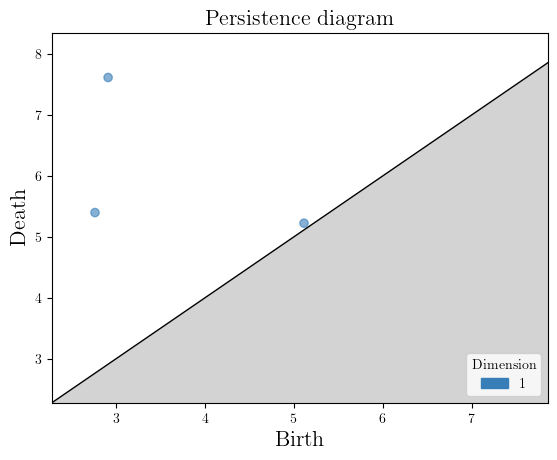

In [12]:
gudhi.plot_persistence_diagram(PHs[1], legend=True)

In [13]:
bar

[(2.91124105865265, 7.611716926339615),
 (2.7640367056198807, 5.3973270366113635),
 (5.113207664135009, 5.223081121783005)]

In [14]:
births

[2.91124105865265, 2.7640367056198807, 5.113207664135009]

In [15]:
deaths

[7.611716926339615, 5.3973270366113635, 5.223081121783005]